### Seaborn - 고급 그래프
- Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급버전

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
sns.set_style('darkgrid')


<AxesSubplot: xlabel='age', ylabel='fare'>

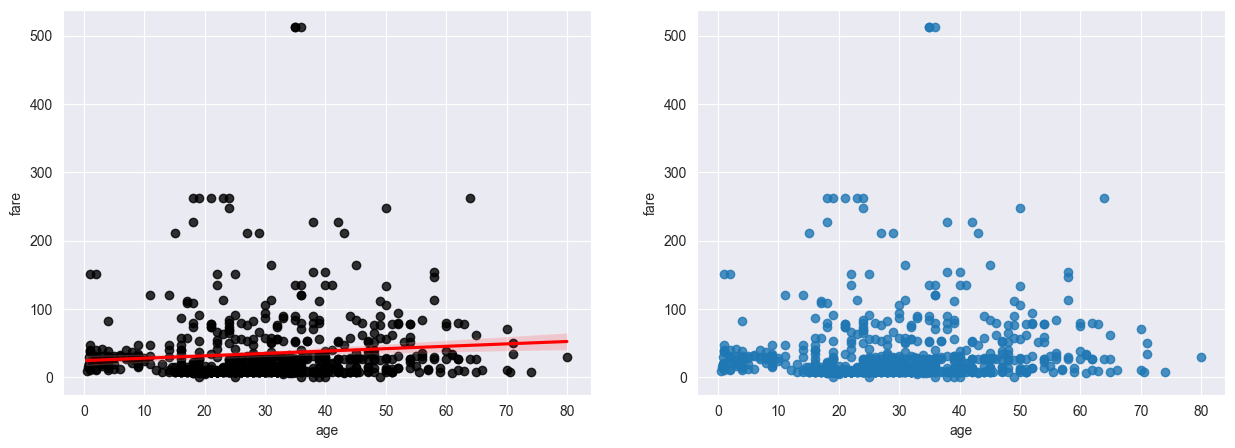

In [8]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형회귀선 표시
sns.regplot(
    x='age',
    y='fare',
    data=titanic,
    scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color
    ax=ax1,
    fit_reg=True
)

sns.regplot(
    x='age',
    y='fare',
    data=titanic,
    # scatter_kws={'color' : 'black'}, # scatter color
    # line_kws={'color' : 'red'}, # regression line color
    ax=ax2,
    fit_reg=False
)

---
## 히스토그램 / 커널 밀도 그래프
커널밀도 함수는 그래프와 x축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수

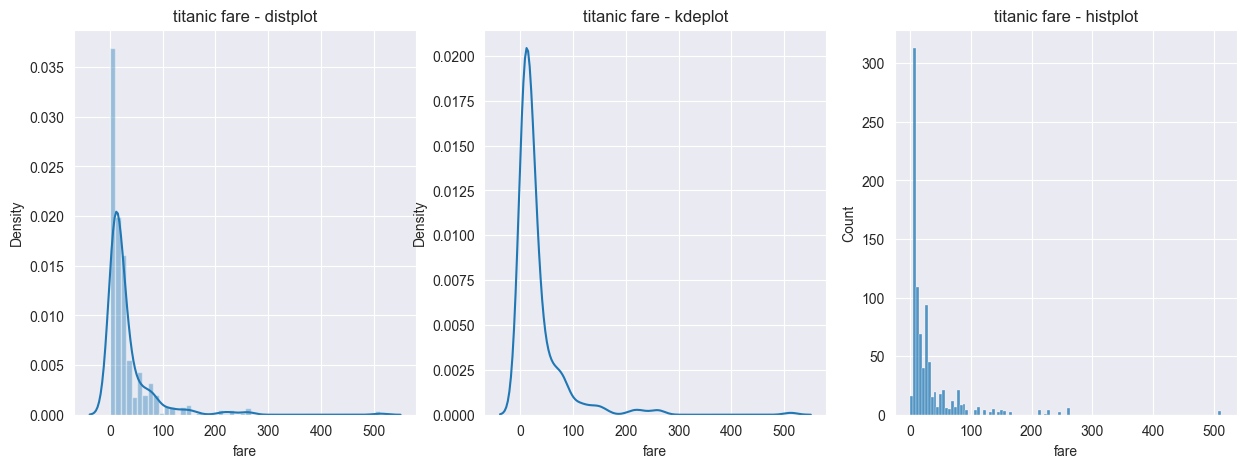

In [13]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot(히스토그램 / 커널밀도)
sns.distplot(titanic['fare'], ax=ax1)

# kdeplot(커널밀도)
sns.kdeplot(x='fare', data=titanic, ax=ax2)

# histplot(히스토그램)
sns.histplot(x='fare', data=titanic, ax=ax3)

ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kdeplot')
ax3.set_title('titanic fare - histplot')

plt.show()

---
### 히트맵(heatmap)
- 2개의 범주형 변수를 각각 x,y축에 놓고 데이터를 매트릭스 형태로 분류

In [14]:
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
# aggfunc = 'size' : data값의 크기를 기준으로 집계 한다.
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


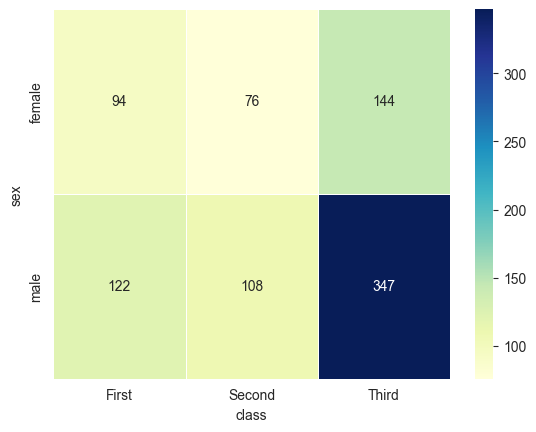

In [23]:
sns.heatmap(
    table,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar=True
)

plt.show()

Theme : darkgrid, whitegrid, dark, white, ticks

---
### 범주형 데이터의 산점도

In [34]:
sns.set_style('darkgrid')

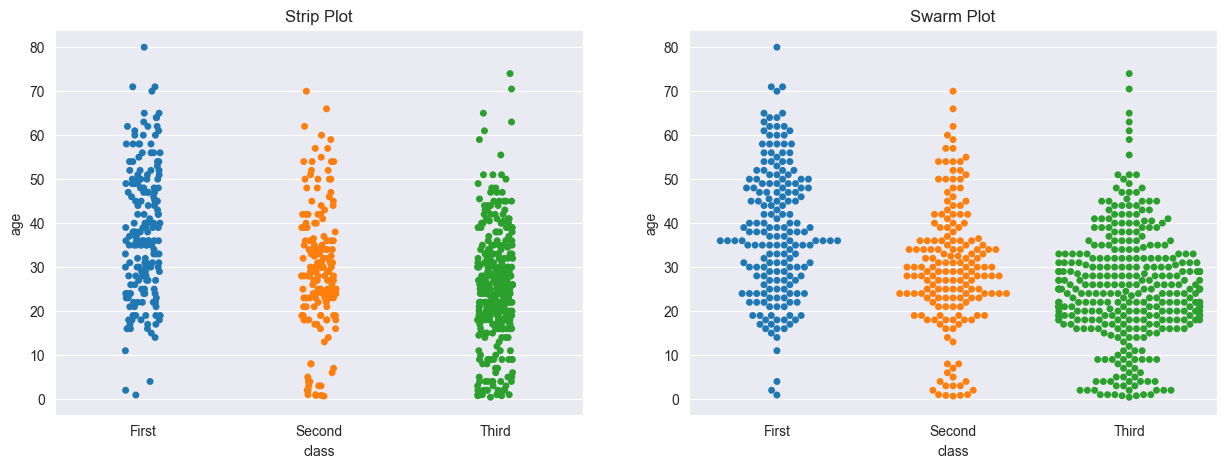

In [38]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(
    x='class',
    y='age',
    data=titanic,
    ax=ax1,
    hue='class',
    legend=False
)

sns.swarmplot(
    x='class',
    y='age',
    data=titanic,
    ax=ax2,
    hue='class',
    legend=False
)

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

---
### 오차 막대그래프

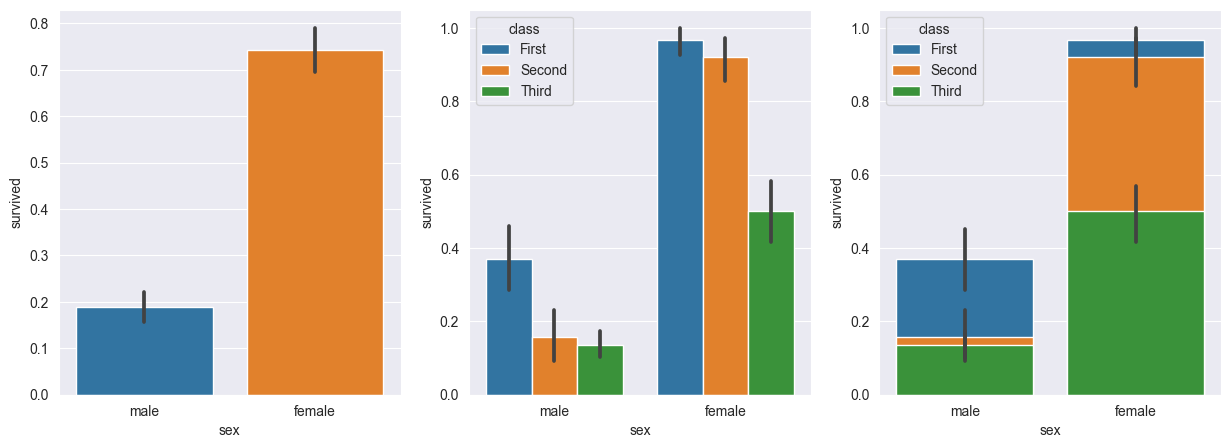

In [45]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(
    x='sex',
    y='survived',
    data=titanic,
    ax=ax1,
    # ci='sd'
)

sns.barplot(
    x='sex',
    y='survived',
    data=titanic,
    ax=ax2,
    hue='class'
)

sns.barplot(
    x='sex',
    y='survived',
    data=titanic,
    ax=ax3,
    hue='class',
    dodge=False
)

plt.show()

---
### 빈도 그래프

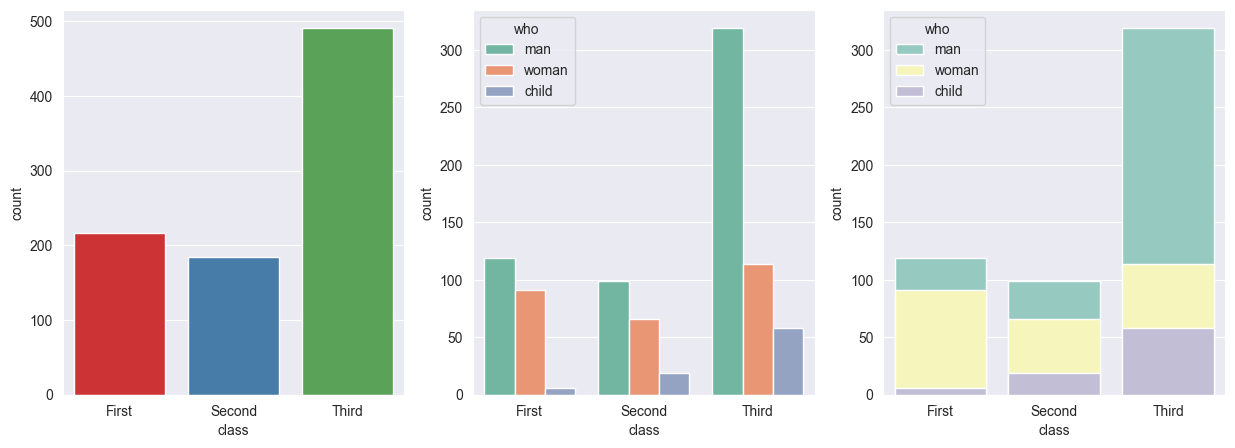

In [53]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(
    x='class',
    data=titanic,
    palette='Set1',
    ax=ax1
)

sns.countplot(
    x='class',
    hue='who',
    data=titanic,
    palette='Set2',
    ax=ax2
)

sns.countplot(
    x='class',
    hue='who',
    data=titanic,
    palette='Set3',
    dodge=False,
    ax=ax3
)

plt.show()

---
### 박스 플롯 / 바이올린 그래프
- 박스플롯은 범주형 데이터의 분포와 주요 통계지표를 제공하지만 데이터가 분산의 정도를 알기 어렵다.
- 바이올린 그래프 : 박스플롯에 커널 밀도 함수 그래프를 추가

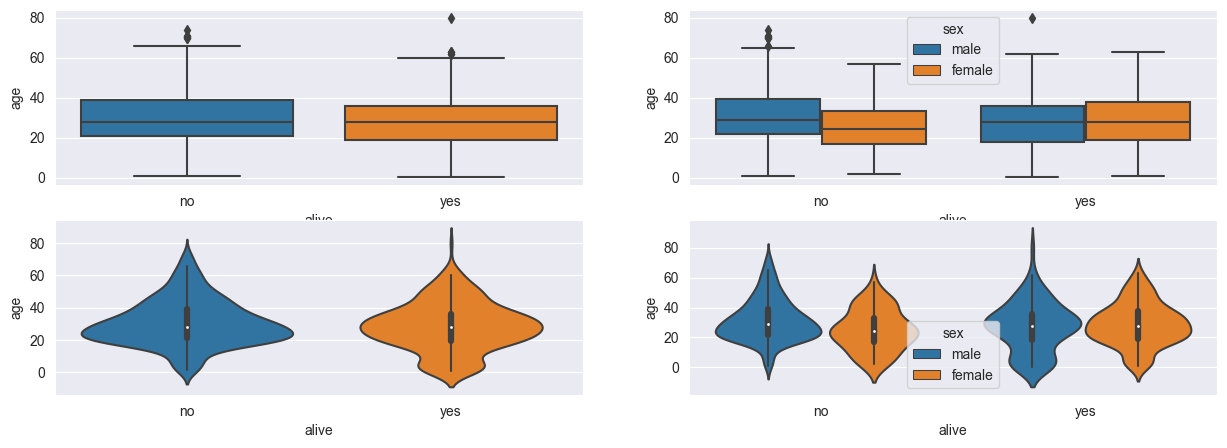

In [61]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(
    x='alive',
    y='age',
    data=titanic,
    ax=ax1
)

# 박스플롯 + hue
sns.boxplot(
    x='alive',
    y='age',
    hue='sex',
    data=titanic,
    ax=ax2,
)

# 바이올린 그래프 - 기본값
sns.violinplot(
    x='alive',
    y='age',
    data=titanic,
    ax=ax3
)

# 바이올린 그래프 + hue
sns.violinplot(
    x='alive',
    y='age',
    hue='sex',
    data=titanic,
    ax=ax4
)

plt.show()

---
### 조인트 그래프
- 산점도를 기본으로 하고 각 측에 대한 히스토그램을 동시 제공

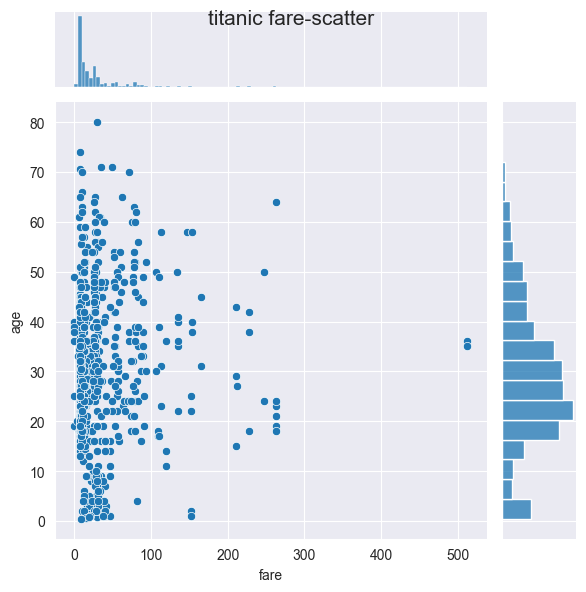

In [64]:
# 조인트 그래프 - 산점도 (기본값)
j1 = sns.jointplot(
    x='fare',
    y='age',
    data=titanic
)

j1.fig.suptitle('titanic fare-scatter', size=15)

plt.show()

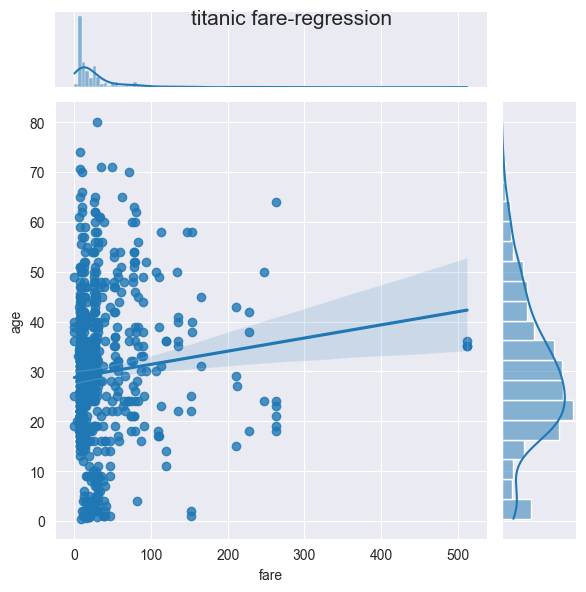

In [65]:
# 조인트 그래프 - 회귀선
j2 = sns.jointplot(
    x='fare',
    y='age',
    kind='reg',
    data=titanic
)

j2.fig.suptitle('titanic fare-regression', size=15)

plt.show()

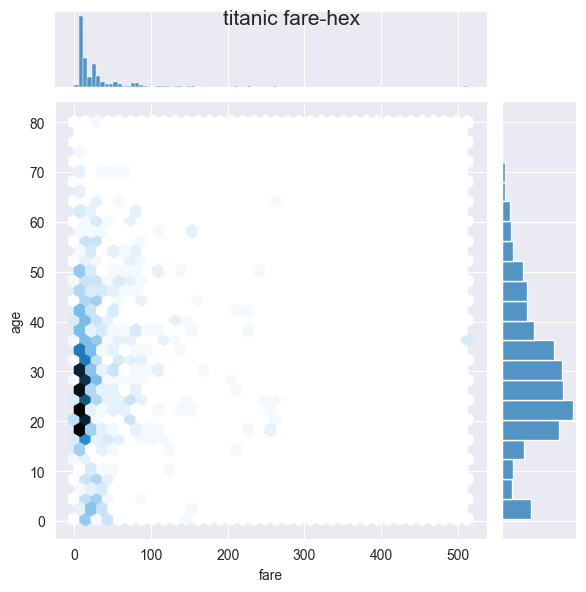

In [67]:
# 조인트 그래프 - 육각그래프
j3 = sns.jointplot(
    x='fare',
    y='age',
    kind='hex',
    data=titanic
)

j3.fig.suptitle('titanic fare-hex', size=15)

plt.show()

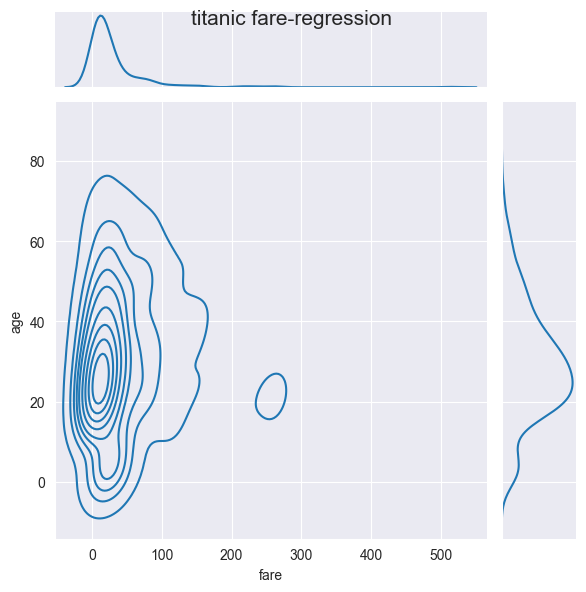

In [68]:
# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(
    x='fare',
    y='age',
    kind='kde',
    data=titanic
)

j4.fig.suptitle('titanic fare-regression', size=15)

plt.show()

---
### 조건을 적용하여 화면을 그리드로 분할하기

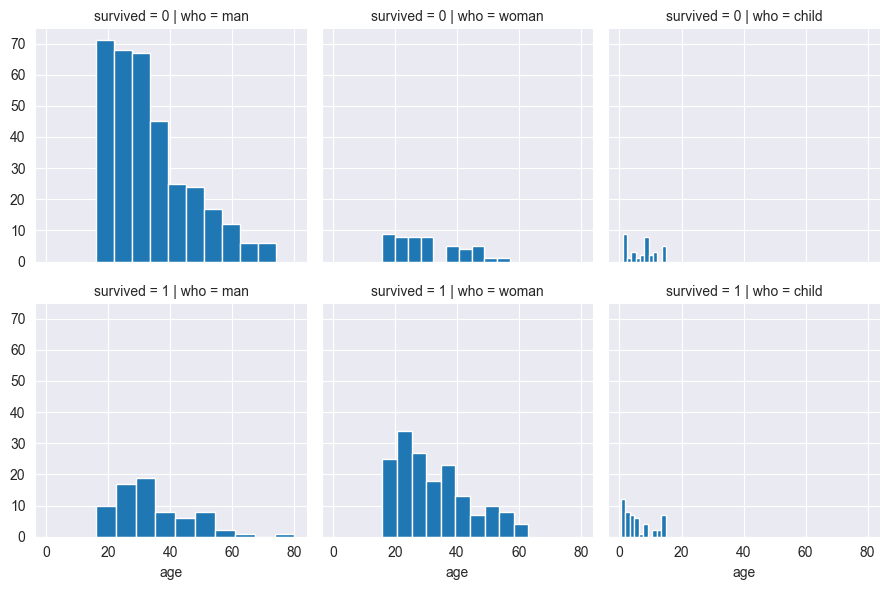

In [72]:
g = sns.FacetGrid(
    data=titanic,
    col='who',
    row='survived'
)

g.map(plt.hist, 'age')
plt.show()

---
### 이변수 데이터의 분포
- 매트릭스 형태로 찍을 지어 표현

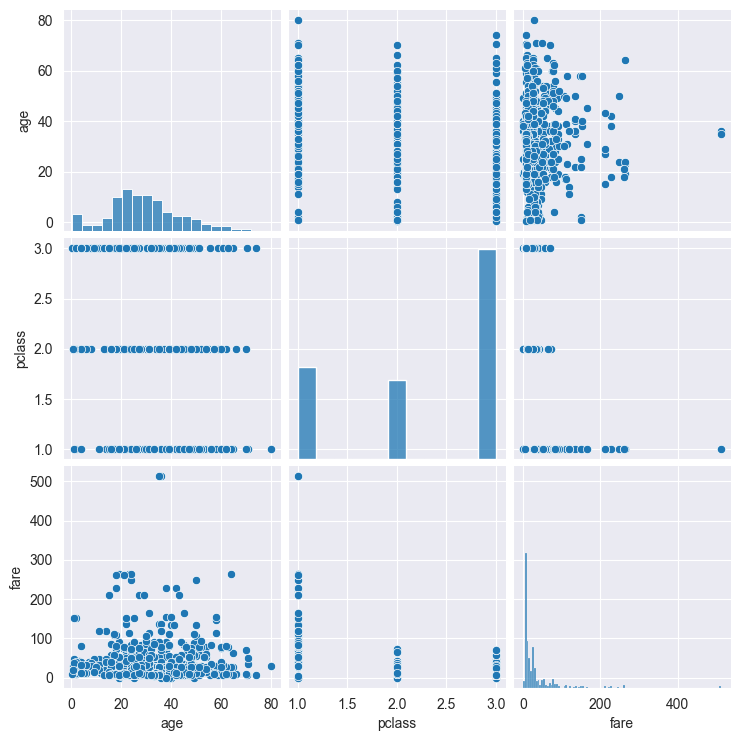

In [74]:
titanic_pair = titanic[['age','pclass','fare']]
sns.pairplot(titanic_pair)
plt.show()